In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
dfb = pd.read_csv("wbc.csv")
dfb=dfb[dfb.bare_nuclei!='?']
dfb['bare_nuclei']=dfb['bare_nuclei'].astype(object).astype(int)
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       683 non-null int64
cell_size             683 non-null int64
cell_shape            683 non-null int64
marginal_adhesion     683 non-null int64
epitelial_cellsize    683 non-null int64
bare_nuclei           683 non-null int32
bland_chromatin       683 non-null int64
normal_nucleoli       683 non-null int64
mitoses               683 non-null int64
jenis                 683 non-null int64
dtypes: int32(1), int64(9)
memory usage: 56.0 KB


In [3]:
X = dfb.drop([dfb.columns[-1]], axis=1)
y = dfb.jenis.map({2: 0, 4: 1})

In [4]:
RAND_SEED_SPLIT = RAND_SEED_TUNING = 84

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=RAND_SEED_SPLIT)

In [6]:
svc=SVC()

In [7]:
C_range= [2**i for i in [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15]]
gamma_range= [2**i for i in [-15, -13, -11, -9, -7, -5, -3, -1, 1, 3]]

In [7]:
def cost_breast_cancer(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    FN = CM[1][0]
    FP = CM[0][1]
    costBC=((-1*((228.35*FP)+(2850000*FN))))
    return costBC

In [8]:
def specificity(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    nilai=(TN/(FP+TN))
    return nilai

In [9]:
def output_score(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity=(TN/(FP+TN))
    sensitivity=(TP/(TP+FN))
    accuracy=((TP+TN)/(TP+FP+TN+FN))
    costBC=((-1*((228.35*FP)+(2850000*FN))))
    return (specificity, sensitivity, accuracy, costBC)

In [10]:
my_custom_scorer=make_scorer(cost_breast_cancer, greater_is_better=True)
score_specificity=make_scorer(specificity, greater_is_better=True)
output_scoring=make_scorer(output_score, greater_is_better=True)

In [11]:
print(__doc__)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range},]

scores = [my_custom_scorer]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2 = GridSearchCV(svc, tuned_parameters, cv=10,
                       scoring=my_custom_scorer)
    clf2.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf2.cv_results_['mean_test_score']
    stds = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for make_scorer(cost_breast_cancer)

Best parameters set found on development set:

{'gamma': 0.125, 'C': 0.5, 'kernel': 'rbf'}

Grid scores on development set:

-46479321.663 (+/-2632762.923) for {'gamma': 3.0517578125e-05, 'C': 0.03125, 'kernel': 'rbf'}
-46479321.663 (+/-2632762.923) for {'gamma': 0.0001220703125, 'C': 0.03125, 'kernel': 'rbf'}
-43641794.311 (+/-6265938.437) for {'gamma': 0.00048828125, 'C': 0.03125, 'kernel': 'rbf'}
-4552652.822 (+/-5197367.970) for {'gamma': 0.001953125, 'C': 0.03125, 'kernel': 'rbf'}
-1409636.541 (+/-3810852.088) for {'gamma': 0.0078125, 'C': 0.03125, 'kernel': 'rbf'}
-561656.892 (+/-2267206.208) for {'gamma': 0.03125, 'C': 0.03125, 'kernel': 'rbf'}
-592.611 (+/-816.889) for {'gamma': 0.125, 'C': 0.03125, 'kernel': 'rbf'}
-46479321.663 (+/-2632762.923) for {'gamma': 0.5, 'C': 0.03125, 'kernel': 'rbf'}
-46479321.663 (+/-2632762.923) for {'gamma': 2, 'C': 0.03

In [12]:
print("Best score cost obtained: {0}".format(clf2.best_score_))
print("Parameters:")
for key, value in clf2.best_params_.items():
    print("\t{}: {}".format(key, value))

Best score cost obtained: -524.1556892778992
Parameters:
	gamma: 0.125
	C: 0.5
	kernel: rbf


In [13]:
clf2.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
bestSVC=SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
bestSVC.fit(X_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
scores1=cross_val_score(bestSVC,X_train,y_train,cv=10,scoring=score_specificity)

In [17]:
print("Specificity: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))

Specificity: 0.9217 (+/- 0.1065)


In [18]:
scores2=cross_val_score(bestSVC,X_train,y_train,cv=10,scoring=my_custom_scorer)

In [19]:
print("Score cost: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))

Score cost: -525.2050 (+/- 708.9891)


In [20]:
scores3=cross_val_score(bestSVC,X_train,y_train,cv=10,scoring='recall')

In [21]:
print("Recall: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() * 2))

Recall: 1.0000 (+/- 0.0000)


In [22]:
scores4=cross_val_score(bestSVC,X_train,y_train,cv=10,scoring='accuracy')

In [23]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() * 2))

Accuracy: 0.9496 (+/- 0.0689)


In [37]:
y_predSVMB = bestSVC.predict(X_test)
accuracy = accuracy_score(y_test, y_predSVMB)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predSVMB)
print(classification_report(y_test, y_predSVMB))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_test, y_predSVMB)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_test, y_predSVMB)

             precision    recall  f1-score   support

          0       1.00      0.92      0.96       150
          1       0.86      1.00      0.93        76

avg / total       0.95      0.95      0.95       226

Akurasi: 0.9469
Specificity: 0.9200
Recall: 1.0000


(0.92000000000000004, 1.0, 0.94690265486725667, -2740.1999999999998)

In [39]:
confusion_matrix(y_test,y_predSVMB)

array([[138,  12],
       [  0,  76]])

In [14]:
y_predSVMB = bestSVC.predict(X_test)
accuracy = accuracy_score(y_test, y_predSVMB)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predSVMB)
print(classification_report(y_test, y_predSVMB))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_test, y_predSVMB)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_test, y_predSVMB)

             precision    recall  f1-score   support

          0       1.00      0.92      0.96       150
          1       0.86      1.00      0.93        76

avg / total       0.95      0.95      0.95       226

Akurasi: 0.9469
Specificity: 0.9200
Recall: 1.0000


(0.92000000000000004, 1.0, 0.94690265486725667, -2740.1999999999998)

In [13]:
from xgboost import XGBClassifier

c:\users\annisa\anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
from sklearn.cross_validation import StratifiedKFold

In [16]:
cv = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=RAND_SEED_SPLIT)

In [17]:
classifier = XGBClassifier()

In [29]:
print(__doc__)

# Set the parameters by cross-validation
tuned_parameters ={'n_estimators': [10,20,30,50],
                    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.],
                    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.],
                    'reg_alpha': [0., 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5., 10.],
                    'reg_lambda': [0., 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5., 10.],
                    'scale_pos_weight': np.linspace(1., (y_train == 2).sum() / y_train.sum(), 10)
                   }    

                  
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}
scores = [my_custom_scorer]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(estimator=XGBClassifier(**params_fixed, seed=RAND_SEED_TUNING),
    param_distributions=tuned_parameters, cv=cv, scoring=my_custom_scorer)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for make_scorer(cost_breast_cancer)

Best parameters set found on development set:

{'colsample_bytree': 0.7, 'n_estimators': 10, 'subsample': 0.5, 'scale_pos_weight': 0.77777777777777779, 'reg_alpha': 0.01, 'reg_lambda': 0.01}

Grid scores on development set:

-6510836.026 (+/-8815214.548) for {'colsample_bytree': 1.0, 'n_estimators': 30, 'subsample': 0.5, 'scale_pos_weight': 0.11111111111111116, 'reg_alpha': 0.001, 'reg_lambda': 0.5}
-1428347.511 (+/-2850175.062) for {'colsample_bytree': 0.7, 'n_estimators': 10, 'subsample': 0.5, 'scale_pos_weight': 0.77777777777777779, 'reg_alpha': 0.01, 'reg_lambda': 0.01}
-2002089.805 (+/-3631931.010) for {'colsample_bytree': 0.9, 'n_estimators': 10, 'subsample': 0.5, 'scale_pos_weight': 0.88888888888888884, 'reg_alpha': 0.05, 'reg_lambda': 0.005}
-2276441.585 (+/-3409209.948) for {'colsample_bytree': 0.8, 'n_estimators': 30, 'subsample': 0.5, 'scale_pos_wei

In [30]:
print("Best score cost obtained: {0}".format(clf.best_score_))
print("Parameters:")
for key, value in clf.best_params_.items():
    print("\t{}: {}".format(key, value))

Best score cost obtained: -1428347.5112691468
Parameters:
	colsample_bytree: 0.7
	n_estimators: 10
	subsample: 0.5
	scale_pos_weight: 0.7777777777777778
	reg_alpha: 0.01
	reg_lambda: 0.01


In [31]:
clf.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.01, reg_lambda=0.01,
       scale_pos_weight=0.77777777777777779, seed=84, silent=1,
       subsample=0.5)

In [18]:
bestXGB=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.01, reg_lambda=0.01,
       scale_pos_weight=0.77777777777777779, seed=84, silent=1,
       subsample=0.5)

In [19]:
bestXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.01, reg_lambda=0.01,
       scale_pos_weight=0.7777777777777778, seed=84, silent=1,
       subsample=0.5)

In [34]:
scores4=cross_val_score(bestXGB,X_train,y_train,cv=cv,scoring=my_custom_scorer)
print("Score cost: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() * 2))

Score cost: -1425228.3500 (+/- 2850182.6888)


In [35]:
scores1=cross_val_score(bestXGB,X_train,y_train,cv=cv,scoring=score_specificity)
print("Specificity: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))
scores2=cross_val_score(bestXGB,X_train,y_train,cv=cv,scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))
scores3=cross_val_score(bestXGB,X_train,y_train,cv=cv,scoring='recall')
print("Recall: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() * 2))


Specificity: 0.9661 (+/- 0.0429)
Accuracy: 0.9673 (+/- 0.0447)
Recall: 0.9695 (+/- 0.0611)


In [40]:
y_predXGBB = bestXGB.predict(X_test)
accuracy = accuracy_score(y_test, y_predXGBB)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predXGBB)
print(classification_report(y_test, y_predXGBB))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_test, y_predXGBB)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_test, y_predXGBB)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       150
          1       0.94      0.95      0.94        76

avg / total       0.96      0.96      0.96       226

Akurasi: 0.9602
Specificity: 0.9667
Recall: 0.9474


(0.96666666666666667, 0.94736842105263153, 0.96017699115044253, -11401141.75)

In [41]:
confusion_matrix(y_test,y_predXGBB)

array([[145,   5],
       [  4,  72]])

In [23]:
y_predXGBB = bestXGB.predict(X_test)
accuracy = accuracy_score(y_test, y_predXGBB)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predXGBB)
print(classification_report(y_test, y_predXGBB))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_test, y_predXGBB)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_test, y_predXGBB)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       150
          1       0.94      0.95      0.94        76

avg / total       0.96      0.96      0.96       226

Akurasi: 0.9602
Specificity: 0.9667
Recall: 0.9474


(0.96666666666666667, 0.94736842105263153, 0.96017699115044253, -11401141.75)

In [20]:
import numpy as np
seed = 7
np.random.seed(seed)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import optimizers

Using Theano backend.


In [22]:
def create_model10a():
    model10 = Sequential()
    model10.add(Dense(7, input_dim=9, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(7, activation='relu'))
    model10.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model10.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model10

In [23]:
from keras.models import load_model
model=create_model10a()

In [24]:
model.save_weights('my_model_weights.h5')

In [25]:
from sklearn.model_selection import train_test_split
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, y,test_size=0.33, random_state=seed )

In [27]:
import warnings
warnings.filterwarnings('ignore', message='.*is ill-defined', append=True)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [28]:
epochs = [10, 20, 50, 100, 200, 500]
class_weight = [{0 : 1., 1: 2},
                {0 : 1., 1: 4},
                {0 : 1., 1: 8},
                {0 : 1., 1: 16},
                {0 : 1., 1: 32},
                {0 : 1., 1: 64}]
results=[]
model.load_weights('my_model_weights.h5')

for epochs_idx in range(len(epochs)):
  for class_weight_idx in range(len(class_weight)):
    param1 = epochs[epochs_idx]
    param2 = class_weight[class_weight_idx]
    bestmodelNN = KerasClassifier(build_fn=create_model10a, epochs= param1, class_weight = param2, verbose=0)
    model.load_weights('my_model_weights.h5')
    print("Epochs : %r & Class Weight : %r)" % (param1, param2))
    scores1=cross_val_score(bestmodelNN,X_trainb.as_matrix(),y_trainb,cv=10,scoring=score_specificity)
    print("Specificity: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() ))
    model.load_weights('my_model_weights.h5')
    scores2=cross_val_score(bestmodelNN,X_trainb.as_matrix(),y_trainb,cv=10,scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() ))
    model.load_weights('my_model_weights.h5')
    scores3=cross_val_score(bestmodelNN,X_trainb.as_matrix(),y_trainb,cv=10,scoring='recall')
    print("Recall: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() ))
    model.load_weights('my_model_weights.h5')
    scores4=cross_val_score(bestmodelNN,X_trainb.as_matrix(), y_trainb, cv=10, scoring=my_custom_scorer)
    print("Score cost: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() ))
    print()
    print()


Epochs : 10 & Class Weight : {0: 1.0, 1: 2})
Specificity: 0.9090 (+/- 0.1205)
Accuracy: 0.8723 (+/- 0.1428)
Recall: 0.9484 (+/- 0.0698)
Score cost: -3420867.7300 (+/- 5065916.3661)


Epochs : 10 & Class Weight : {0: 1.0, 1: 4})
Specificity: 0.5848 (+/- 0.3436)
Accuracy: 0.5979 (+/- 0.2413)
Recall: 0.9804 (+/- 0.0394)
Score cost: -574589.8350 (+/- 1709080.2670)


Epochs : 10 & Class Weight : {0: 1.0, 1: 8})
Specificity: 0.1543 (+/- 0.3087)
Accuracy: 0.4436 (+/- 0.1834)
Recall: 1.0000 (+/- 0.0000)
Score cost: -290845.7600 (+/- 853204.1465)


Epochs : 10 & Class Weight : {0: 1.0, 1: 16})
Specificity: 0.0970 (+/- 0.2909)
Accuracy: 0.3392 (+/- 0.0551)
Recall: 1.0000 (+/- 0.0000)
Score cost: -6873.3350 (+/- 608.0288)


Epochs : 10 & Class Weight : {0: 1.0, 1: 32})
Specificity: 0.0000 (+/- 0.0000)
Accuracy: 0.3392 (+/- 0.0551)
Recall: 1.0000 (+/- 0.0000)
Score cost: -6896.1700 (+/- 584.8614)


Epochs : 10 & Class Weight : {0: 1.0, 1: 64})
Specificity: 0.0000 (+/- 0.0000)
Accuracy: 0.3392 (+/-

In [29]:
best_class_weight = {0: 1.0, 1: 64}

In [31]:
bestmodelNN_test = KerasClassifier(build_fn=create_model10a, epochs= 50, class_weight = best_class_weight, verbose=0)

In [32]:
import warnings
warnings.filterwarnings('ignore', message='.*is ill-defined', append=True)
warnings.filterwarnings('ignore', category=DeprecationWarning)
for i in range(10):
    model.load_weights('my_model_weights.h5')
    scores1=cross_val_score(bestmodelNN_test, X_trainb.as_matrix(),y_trainb,cv=10,scoring=score_specificity)
    print("Specificity: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std()*2))
    model.load_weights('my_model_weights.h5')
    scores3=cross_val_score(bestmodelNN_test, X_trainb.as_matrix(),y_trainb,cv=10,scoring='recall')
    print("Recall: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std()*2))
    print()
    print()

Specificity: 0.6655 (+/- 0.7164)
Recall: 1.0000 (+/- 0.0000)


Specificity: 0.7413 (+/- 0.7511)
Recall: 0.9938 (+/- 0.0375)


Specificity: 0.6147 (+/- 0.8194)
Recall: 0.9941 (+/- 0.0353)


Specificity: 0.7598 (+/- 0.5400)
Recall: 1.0000 (+/- 0.0000)


Specificity: 0.8446 (+/- 0.5738)
Recall: 0.9909 (+/- 0.0545)


Specificity: 0.4929 (+/- 0.8466)
Recall: 0.9909 (+/- 0.0545)


Specificity: 0.6227 (+/- 0.8320)
Recall: 1.0000 (+/- 0.0000)


Specificity: 0.6533 (+/- 0.7485)
Recall: 0.9941 (+/- 0.0353)


Specificity: 0.7698 (+/- 0.6322)
Recall: 0.9875 (+/- 0.0750)


Specificity: 0.8855 (+/- 0.1961)
Recall: 0.9791 (+/- 0.0658)




In [33]:
bestmodelNN_test.fit(X_trainb.as_matrix(), y_trainb)

In [34]:
y_predNNB = bestmodelNN_test.predict(X_testb.as_matrix())
accuracy = accuracy_score(y_testb, y_predNNB)
precision, recall, f1, _ = precision_recall_fscore_support(y_testb, y_predNNB)
print(classification_report(y_testb, y_predNNB))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_testb, y_predNNB)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_testb, y_predNNB)

             precision    recall  f1-score   support

          0       0.99      0.94      0.96       142
          1       0.91      0.98      0.94        84

avg / total       0.96      0.96      0.96       226

Akurasi: 0.9558
Specificity: 0.9437
Recall: 0.9762


(0.94366197183098588,
 0.97619047619047616,
 0.95575221238938057,
 -5701826.7999999998)

In [35]:
confusion_matrix(y_testb,y_predNNB)

array([[134,   8],
       [  2,  82]])

In [42]:
names=['SVM - Dataset B','XGBoost - Dataset B','MLP - Dataset B']

In [43]:
score=bestSVC.predict_proba(X_test)
score2=bestXGB.predict_proba(X_test)
score3=bestmodelNN_test.predict_proba(X_testb.as_matrix())

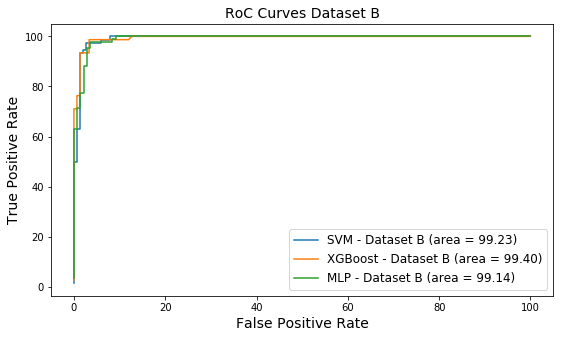

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots(figsize=(9,5))

fpr, tpr, thresholds = roc_curve(y_test, score[:,1],pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, score2[:,1],pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_testb, score3[:,1],pos_label=1)

auc = roc_auc_score(y_test, score[:,1])
auc2 = roc_auc_score(y_test, score2[:,1])
auc3 = roc_auc_score(y_testb, score3[:,1])

ax.plot(fpr*100, tpr*100, label='%s (area = %.2f)' % (names[0], auc*100))
ax.plot(fpr2*100, tpr2*100, label='%s (area = %.2f)' % (names[1], auc2*100))
ax.plot(fpr3*100, tpr3*100, label='%s (area = %.2f)' % (names[2], auc3*100))

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.title("RoC Curves Dataset B",fontsize=14)
plt.legend(prop={'size':12})
ax.set_xlabel('False Positive Rate',fontsize=14)
ax.set_ylabel('True Positive Rate',fontsize=14)
plt.show()